In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import random
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Conv2D ,AveragePooling2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping

In [91]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

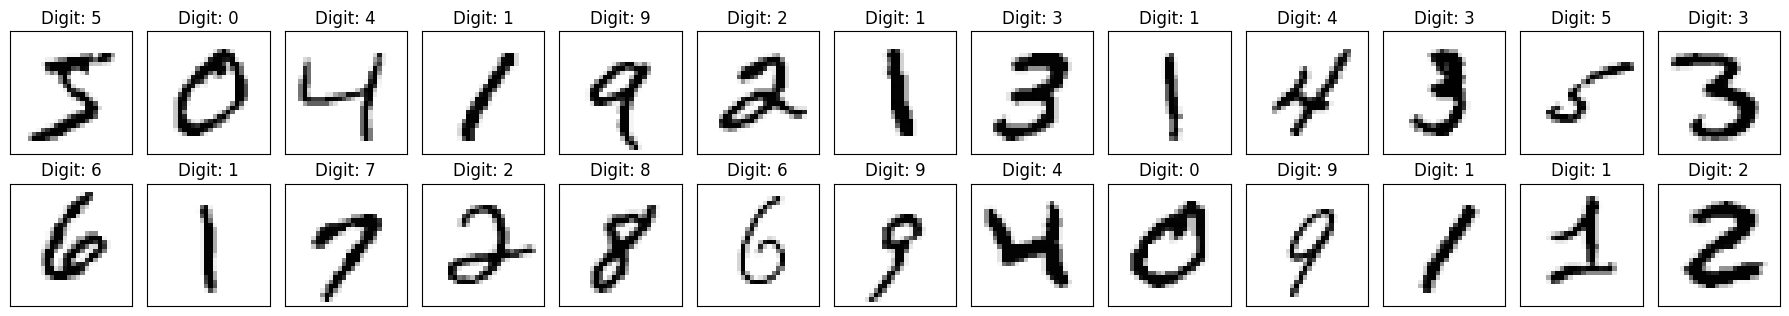

In [92]:
plt.figure(figsize=(18,20))
for i in range(26):
    plt.subplot(13,13,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title(f"Digit: {y_train[i]}")
    plt.imshow(X_train[i],cmap='Greys')
plt.tight_layout()

In [93]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [94]:
model = Sequential([
    Conv2D(6, kernel_size=5, strides=1, activation='tanh', padding='same', input_shape=(28, 28, 1)),
    AveragePooling2D(pool_size=2, strides=2),

    Conv2D(16, kernel_size=5, strides=1, activation='tanh'),
    AveragePooling2D(pool_size=2, strides=2),

    Flatten(),

    Dense(120, activation='tanh'),
    Dense(84, activation='tanh'),
    Dense(10, activation='softmax')
    ])

In [95]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [96]:
history = model.fit(X_train, y_train, epochs=20,batch_size=32, validation_data=(X_test, y_test),callbacks=[EarlyStopping(patience=3)])

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 0.8844 - loss: 0.3969 - val_accuracy: 0.9680 - val_loss: 0.1033
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9725 - loss: 0.0933 - val_accuracy: 0.9750 - val_loss: 0.0812
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 22ms/step - accuracy: 0.9816 - loss: 0.0582 - val_accuracy: 0.9803 - val_loss: 0.0623
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 21ms/step - accuracy: 0.9846 - loss: 0.0491 - val_accuracy: 0.9830 - val_loss: 0.0507
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9876 - loss: 0.0397 - val_accuracy: 0.9820 - val_loss: 0.0547
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9910 - loss: 0.0299 - val_accuracy: 0.9845 - val_loss: 0.0492
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.9922 - loss: 0.0237 - val_accuracy: 0.9862 - val_loss: 0.0478
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 21ms/step - accuracy: 0.9939 -

Text(0.5, 0, 'Epoch')

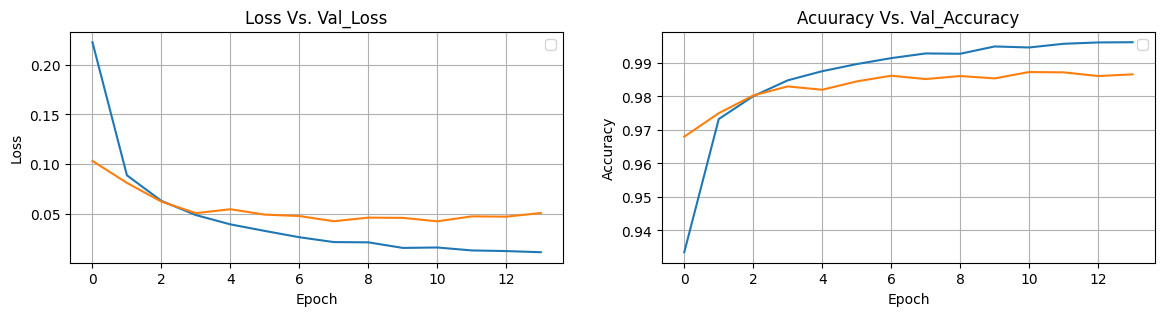

In [97]:
plt.figure(figsize=(14,3))
plt.subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Vs. Val_Loss')
plt.grid(True)
plt.legend()
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.subplot(122)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Acuuracy Vs. Val_Accuracy')
plt.grid(True)
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

In [98]:
test_loss, test_accuracy =model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9832 - loss: 0.0611
Test Loss: 0.0508
Test Accuracy: 0.9866


In [99]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print("Classification Report:")
print(classification_report(y_test, y_pred_classes, digits=4))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
Classification Report:
              precision    recall  f1-score   support

           0     0.9939    0.9908    0.9923       980
           1     0.9982    0.9912    0.9947      1135
           2     0.9931    0.9816    0.9873      1032
           3     0.9737    0.9901    0.9818      1010
           4     0.9858    0.9898    0.9878       982
           5     0.9899    0.9843    0.9871       892
           6     0.9875    0.9864    0.9869       958
           7     0.9854    0.9864    0.9859      1028
           8     0.9756    0.9856    0.9806       974
           9     0.9821    0.9792    0.9806      1009

    accuracy                         0.9866     10000
   macro avg     0.9865    0.9865    0.9865     10000
weighted avg     0.9867    0.9866    0.9866     10000



Text(0.5, 1.0, 'Confusion Matrix')

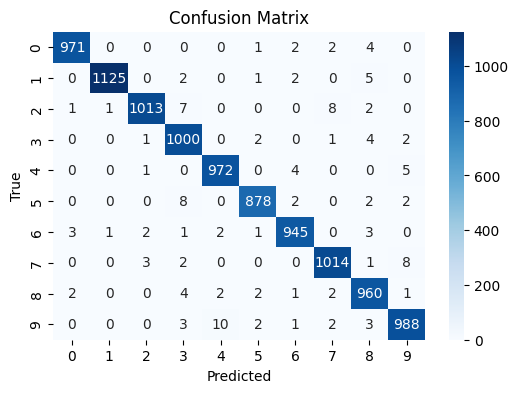

In [100]:
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

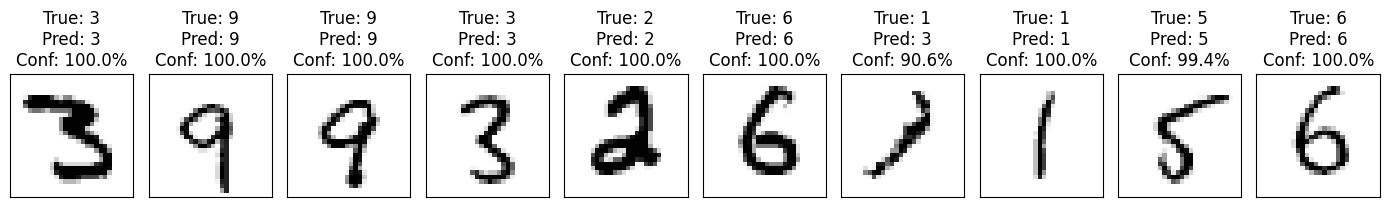

In [101]:
num_img = 10
random_indices = random.sample(range(len(X_test)), num_img)
plt.figure(figsize=(14, 8))
for i, idx in enumerate(random_indices):
    img = X_test[idx].reshape(28, 28)
    true_label = y_test[idx]
    pred_label = y_pred_classes[idx]
    confidence = y_pred[idx][pred_label] * 100
    plt.subplot(1,10, i+1)
    plt.imshow(img, cmap='Greys')
    plt.title(f"True: {true_label}\nPred: {pred_label}\nConf: {confidence:.1f}%")
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()